In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import shapiro
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0


In [4]:
df.shape

(700000, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  int64  
 3   physical_activity_minutes_per_week  700000 non-null  int64  
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  int64  
 10  diastolic_bp                        700000 non-null  int64  
 11  heart_rate                

<Axes: xlabel='alcohol_consumption_per_week', ylabel='Density'>

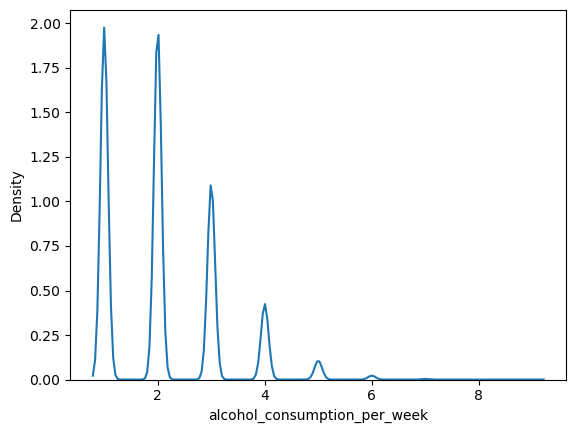

In [6]:
sns.kdeplot(df['alcohol_consumption_per_week'])

<Axes: xlabel='age', ylabel='Density'>

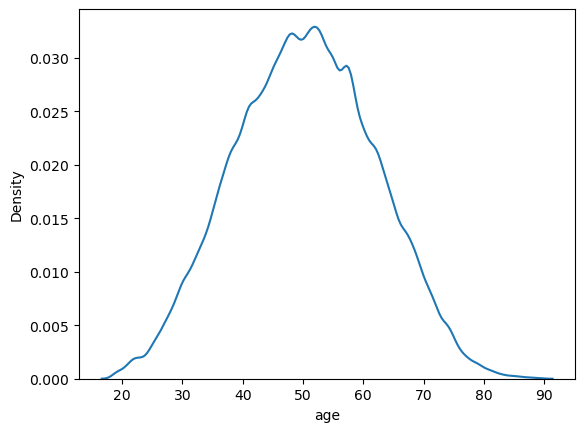

In [7]:
sns.kdeplot(df['age'])

In [8]:
df.isna().sum()

id                                    0
age                                   0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
smoking_status                        0
employment_status                     0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0


### `age column`

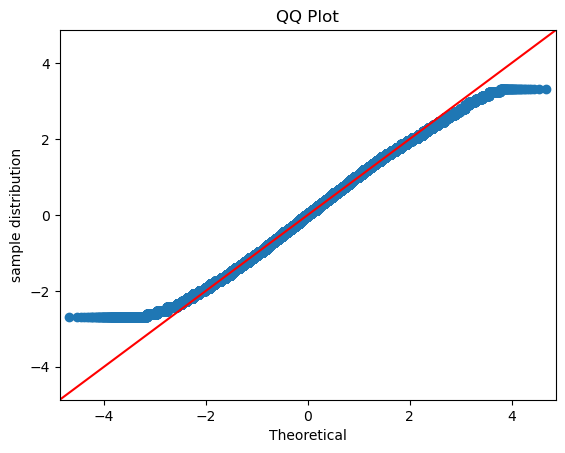

In [9]:
fig = sm.qqplot(df['age'],line='45',fit=True)
plt.title('QQ Plot')
plt.xlabel('Theoretical')
plt.ylabel('sample distribution')
plt.show()

In [10]:
df['age'].describe()

count    700000.000000
mean         50.359734
std          11.655520
min          19.000000
25%          42.000000
50%          50.000000
75%          58.000000
max          89.000000
Name: age, dtype: float64

In [11]:
shapiro_age = shapiro(df['age'])

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 700000.
  res = hypotest_fun_out(*samples, **kwds)


In [12]:
print("Shapiro Wilk test for age column: ",shapiro_age)

Shapiro Wilk test for age column:  ShapiroResult(statistic=np.float64(0.9970563894032051), pvalue=np.float64(8.894220358877344e-58))


In [13]:
df[df['age']>80]

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
132,132,84,4,55,2.8,7.7,4.8,30.9,0.92,125,...,Male,Other,Highschool,Upper-Middle,Never,Employed,0,0,1,0.0
659,659,82,2,39,7.6,7.0,5.8,25.9,0.89,123,...,Female,White,Postgraduate,Low,Former,Employed,0,1,0,1.0
850,850,81,1,64,4.1,7.8,6.6,25.0,0.89,109,...,Female,Hispanic,Highschool,Middle,Former,Retired,0,1,0,1.0
1331,1331,84,1,22,6.3,7.0,5.2,27.6,0.90,135,...,Male,Hispanic,Highschool,Middle,Never,Employed,0,1,0,1.0
2207,2207,81,1,68,5.0,6.7,5.0,27.4,0.80,139,...,Male,Hispanic,Highschool,Middle,Never,Employed,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698124,698124,81,1,227,6.5,7.7,3.7,22.9,0.83,136,...,Female,Black,Highschool,Middle,Never,Employed,1,1,0,1.0
698489,698489,82,1,93,5.3,6.8,8.3,18.6,0.80,132,...,Female,Hispanic,Graduate,Lower-Middle,Current,Employed,0,1,0,1.0
698651,698651,81,1,26,6.3,6.6,9.2,32.2,0.91,134,...,Female,White,Graduate,Lower-Middle,Former,Employed,0,1,0,1.0
699389,699389,81,3,111,8.1,7.5,7.7,31.7,0.89,132,...,Male,White,Highschool,Middle,Former,Employed,0,0,0,1.0


In [14]:
df.drop(columns='id',inplace=True)

### `alcohol_consumption_per_week`

In [15]:
df['alcohol_consumption_per_week'].value_counts()

alcohol_consumption_per_week
2    246592
1    246311
3    137565
4     52973
5     13322
6      2728
7       447
8        59
9         3
Name: count, dtype: int64

In [16]:
df[df['alcohol_consumption_per_week'] >= 8].diagnosed_diabetes.value_counts()

diagnosed_diabetes
1.0    37
0.0    25
Name: count, dtype: int64

<Axes: ylabel='age'>

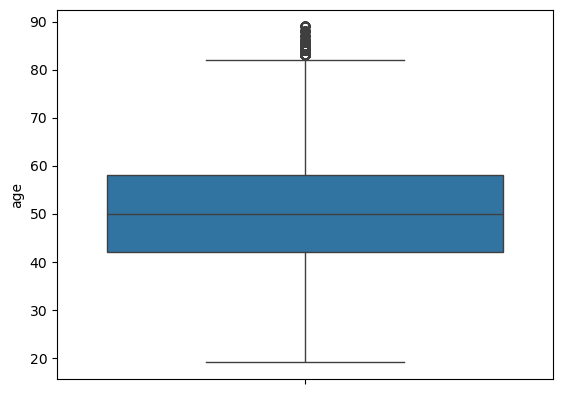

In [17]:
sns.boxplot(df['age'])

In [18]:
df[df['alcohol_consumption_per_week'] == 9]

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
127750,59,9,216,6.9,7.7,8.6,24.5,0.90,125,74,...,Female,White,Highschool,Lower-Middle,Never,Retired,0,1,0,0.0
501138,52,9,119,6.2,8.0,6.7,28.7,0.89,98,71,...,Female,Hispanic,Postgraduate,Low,Never,Employed,0,0,0,1.0
595137,41,9,91,3.6,5.7,4.6,24.5,0.84,99,89,...,Male,White,Highschool,Middle,Never,Employed,0,0,0,0.0


In [19]:
df.drop(df[df['alcohol_consumption_per_week'] == 9].index,inplace=True)

### `physical_activity_minutes_per_week`

<Axes: xlabel='physical_activity_minutes_per_week', ylabel='Density'>

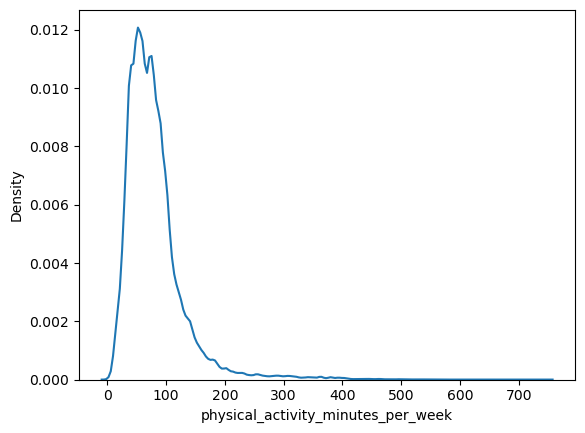

In [20]:
sns.kdeplot(df['physical_activity_minutes_per_week'])

* `Right Skewed data` 

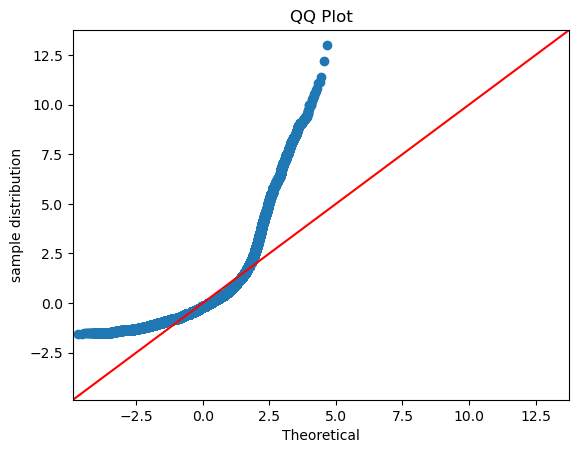

In [21]:
fig = sm.qqplot(df['physical_activity_minutes_per_week'],line='45',fit=True)
plt.title('QQ Plot')
plt.xlabel('Theoretical')
plt.ylabel('sample distribution')
plt.show()

In [22]:
df['physical_activity_minutes_per_week'].describe()

count    699997.000000
mean         80.230538
std          51.194900
min           1.000000
25%          49.000000
50%          71.000000
75%          96.000000
max         747.000000
Name: physical_activity_minutes_per_week, dtype: float64

In [42]:
from sklearn.preprocessing import PowerTransformer

In [45]:
df['physical_activity_minutes_per_week'] = df['physical_activity_minutes_per_week']+0.000001

In [48]:
pt = PowerTransformer(method="box-cox")
physical_activity_minutes_per_week_transformed = pt.fit_transform(df[['physical_activity_minutes_per_week']])

In [23]:
physical_activity_minutes_per_week_log_transformed = np.log1p(df['physical_activity_minutes_per_week'])

<Axes: ylabel='Density'>

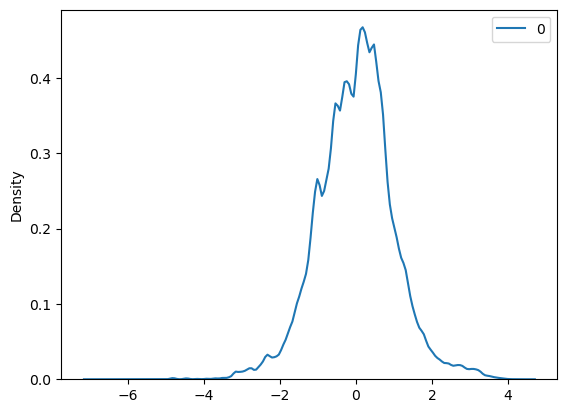

In [50]:
sns.kdeplot(physical_activity_minutes_per_week_transformed)

<Axes: xlabel='physical_activity_minutes_per_week', ylabel='Density'>

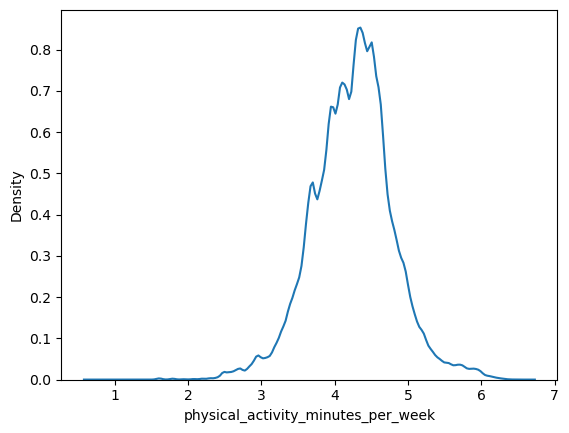

In [53]:
sns.kdeplot(physical_activity_minutes_per_week_log_transformed)

### `BOX-COX Transform`

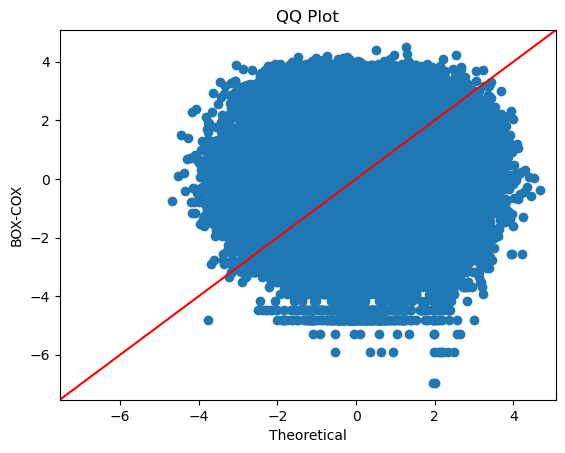

In [59]:
fig = sm.qqplot(physical_activity_minutes_per_week_transformed,line='45',fit=True)
plt.title('QQ Plot')
plt.xlabel('Theoretical')
plt.ylabel('BOX-COX')
plt.show()

### `LOG-Transform`

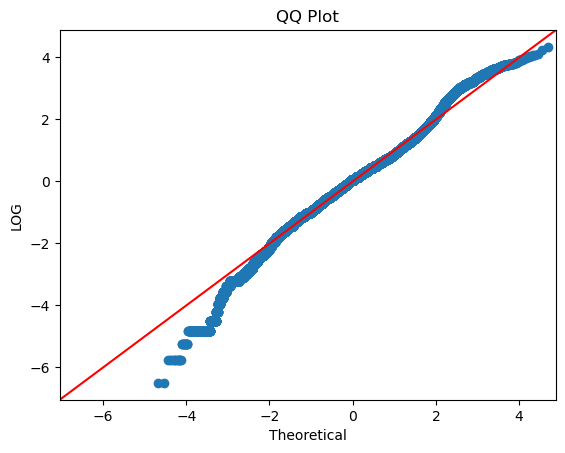

In [24]:
fig = sm.qqplot(physical_activity_minutes_per_week_log_transformed,line='45',fit=True)
plt.title('QQ Plot')
plt.xlabel('Theoretical')
plt.ylabel('LOG')
plt.show()

### `Reciprocal - Transformation`

In [55]:
physical_activity_minutes_per_week_reciprocal_transformed = 1/(df['physical_activity_minutes_per_week']+1)

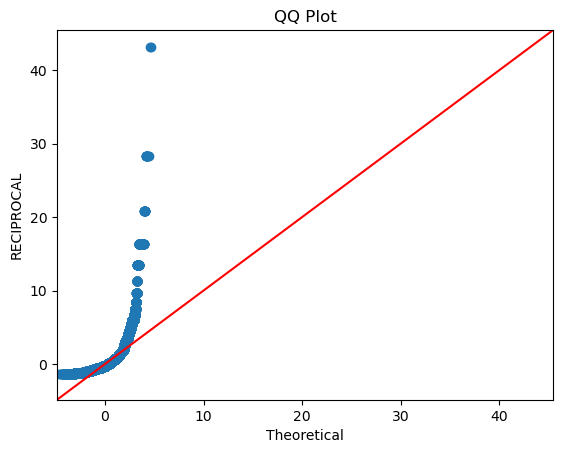

In [61]:
fig = sm.qqplot(physical_activity_minutes_per_week_reciprocal_transformed,line='45',fit=True)
plt.title('QQ Plot')
plt.xlabel('Theoretical')
plt.ylabel('RECIPROCAL')
plt.show()

### `Squared - Transform`

In [57]:
physical_activity_minutes_per_week_sq_transformed = (df['physical_activity_minutes_per_week'])**2

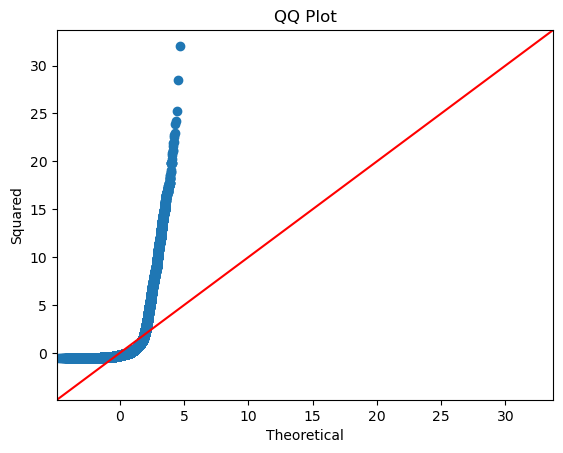

In [62]:
fig = sm.qqplot(physical_activity_minutes_per_week_sq_transformed,line='45',fit=True)
plt.title('QQ Plot')
plt.xlabel('Theoretical')
plt.ylabel('Squared')
plt.show()

In [25]:
df['physical_activity_minutes_per_week'] = physical_activity_minutes_per_week_log_transformed

In [26]:
df.head()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,31,1,3.828641,7.7,6.8,6.1,33.4,0.93,112,70,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,50,2,4.304065,5.7,6.5,5.8,23.8,0.83,120,77,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,32,3,5.068904,8.5,7.4,9.1,24.1,0.83,95,89,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,54,3,4.356709,4.6,7.0,9.2,26.6,0.83,121,69,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,54,1,4.025352,5.7,6.2,5.1,28.8,0.90,108,60,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0


In [27]:
shapiro_physical_activity = shapiro(df['physical_activity_minutes_per_week'])

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 699997.
  res = hypotest_fun_out(*samples, **kwds)


* `Almost normal distribution`

In [28]:
print("shapiro wilk test for physical_activity_minutes_per_week",shapiro_physical_activity)

shapiro wilk test for physical_activity_minutes_per_week ShapiroResult(statistic=np.float64(0.9915112489741342), pvalue=np.float64(1.0671001633935863e-80))


### `diet_score`

<Axes: xlabel='diet_score', ylabel='Density'>

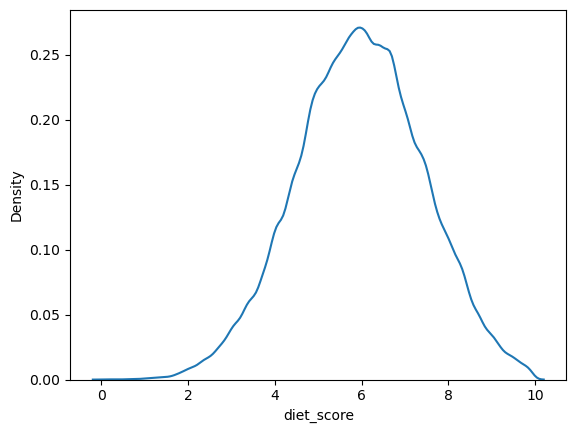

In [29]:
sns.kdeplot(df['diet_score'])

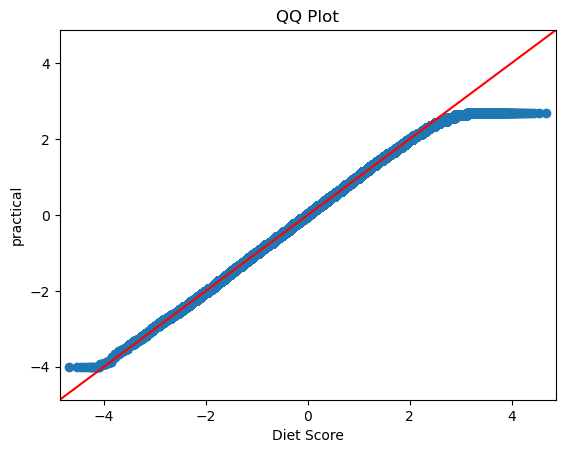

In [30]:
fig = sm.qqplot(df['diet_score'],line='45',fit=True)
plt.title('QQ Plot')
plt.xlabel('Diet Score')
plt.ylabel('practical')
plt.show()

In [31]:
df['diet_score'].describe()

count    699997.000000
mean          5.963696
std           1.463336
min           0.100000
25%           5.000000
50%           6.000000
75%           7.000000
max           9.900000
Name: diet_score, dtype: float64

In [32]:
shapiro_diet_score = shapiro(df['diet_score'])

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 699997.
  res = hypotest_fun_out(*samples, **kwds)


In [33]:
print("shapiro wilk test for physical_activity_minutes_per_week",shapiro_physical_activity)

shapiro wilk test for physical_activity_minutes_per_week ShapiroResult(statistic=np.float64(0.9915112489741342), pvalue=np.float64(1.0671001633935863e-80))


In [73]:
df.head()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,31,1,3.828641,7.7,6.8,6.1,33.4,0.93,112,70,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,50,2,4.304065,5.7,6.5,5.8,23.8,0.83,120,77,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,32,3,5.068904,8.5,7.4,9.1,24.1,0.83,95,89,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,54,3,4.356709,4.6,7.0,9.2,26.6,0.83,121,69,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,54,1,4.025352,5.7,6.2,5.1,28.8,0.90,108,60,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0


In [34]:
skew_age = skew(df['age'])
kurt_age = kurtosis(df['age'], fisher=True)

print(f"skewness of age:{skew_age}, kurtosis of age:{kurt_age}")

skewness of age:0.020905252625217346, kurtosis of age:-0.3867490797108637


In [35]:
skew_physical = skew(df['physical_activity_minutes_per_week'])
kurt_physical = kurtosis(df['physical_activity_minutes_per_week'], fisher=True)

print(f"skewness of age:{skew_physical}, kurtosis of age:{kurt_physical}")

skewness of age:-0.05118139733629014, kurtosis of age:0.9854547678347907


In [36]:
skew_diet = skew(df['diet_score'])
kurt_diet = kurtosis(df['diet_score'], fisher=True)

print(f"skewness of age:{skew_diet}, kurtosis of age:{kurt_diet}")

skewness of age:-0.06296802123986033, kurtosis of age:-0.16125677225205326


### `sleep_hours_per_day`

<Axes: xlabel='sleep_hours_per_day', ylabel='Density'>

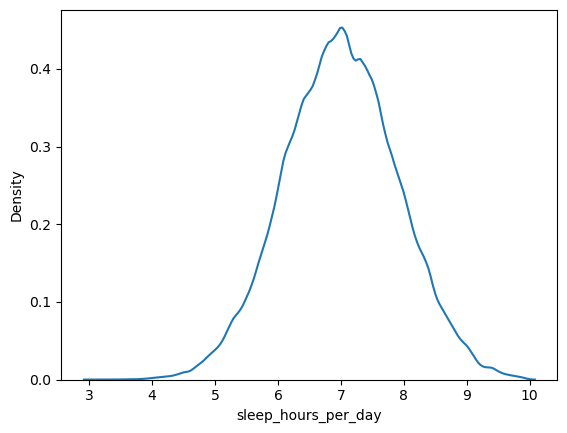

In [37]:
sns.kdeplot(df['sleep_hours_per_day'])

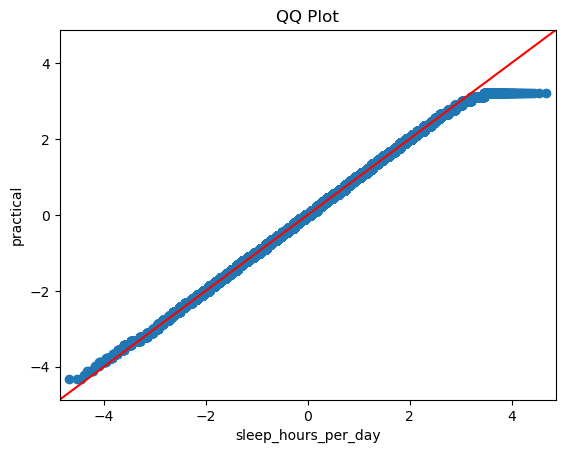

In [38]:
fig = sm.qqplot(df['sleep_hours_per_day'],line='45',fit=True)
plt.title('QQ Plot')
plt.xlabel('sleep_hours_per_day')
plt.ylabel('practical')
plt.show()

In [40]:
skew_sleep = skew(df['sleep_hours_per_day'])
kurt_sleep = kurtosis(df['sleep_hours_per_day'], fisher=True)

print(f"skewness of age:{skew_sleep}, kurtosis of age:{kurt_sleep}")

skewness of age:0.001489846488661899, kurtosis of age:-0.05994699560565886


In [41]:
sleep_hours_per_day_log = np.log1p(df['sleep_hours_per_day'])

In [43]:
from sklearn.preprocessing import PowerTransformer

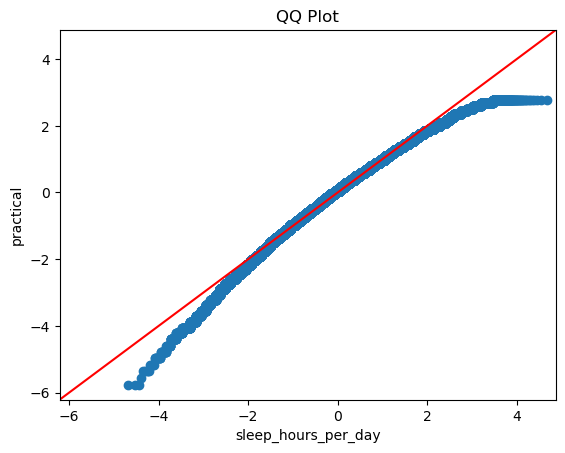

In [42]:
fig = sm.qqplot(sleep_hours_per_day_log,line='45',fit=True)
plt.title('QQ Plot')
plt.xlabel('sleep_hours_per_day')
plt.ylabel('practical')
plt.show()

In [46]:
pt = PowerTransformer()
sleep_hours_per_day_yeo = pt.fit_transform(df[['sleep_hours_per_day']])

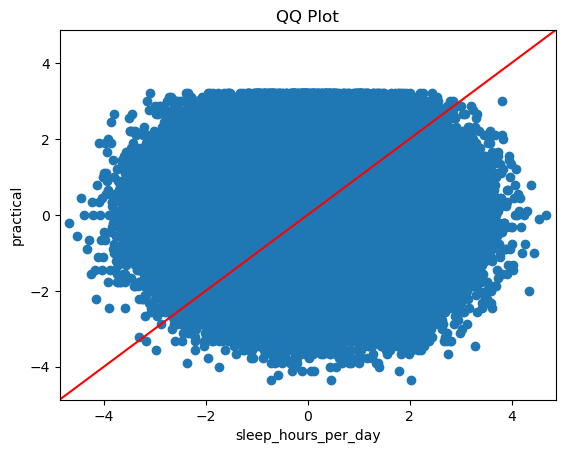

In [47]:
fig = sm.qqplot(sleep_hours_per_day_yeo,line='45',fit=True)
plt.title('QQ Plot')
plt.xlabel('sleep_hours_per_day')
plt.ylabel('practical')
plt.show()

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699997 entries, 0 to 699999
Data columns (total 25 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 699997 non-null  int64  
 1   alcohol_consumption_per_week        699997 non-null  int64  
 2   physical_activity_minutes_per_week  699997 non-null  float64
 3   diet_score                          699997 non-null  float64
 4   sleep_hours_per_day                 699997 non-null  float64
 5   screen_time_hours_per_day           699997 non-null  float64
 6   bmi                                 699997 non-null  float64
 7   waist_to_hip_ratio                  699997 non-null  float64
 8   systolic_bp                         699997 non-null  int64  
 9   diastolic_bp                        699997 non-null  int64  
 10  heart_rate                          699997 non-null  int64  
 11  cholesterol_total              

### `bmi`

<Axes: xlabel='bmi', ylabel='Density'>

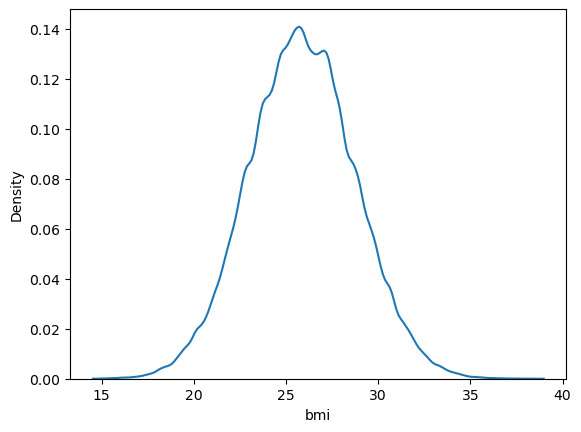

In [49]:
sns.kdeplot(df['bmi'])

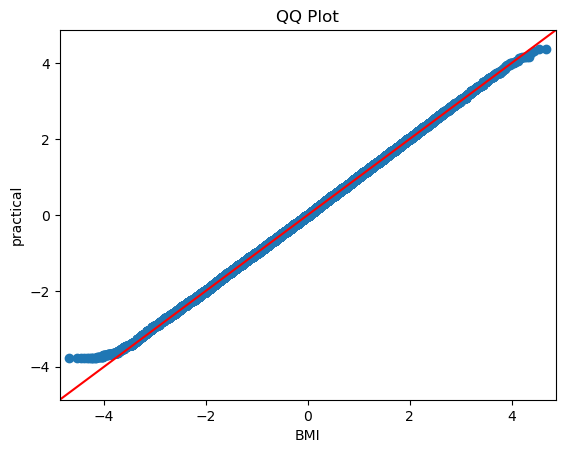

In [50]:
fig = sm.qqplot(df['bmi'],line='45',fit=True)
plt.title('QQ Plot')
plt.xlabel('BMI')
plt.ylabel('practical')
plt.show()

In [51]:
skew_bmi = skew(df['bmi'])
kurt_bmi = kurtosis(df['bmi'], fisher=True)

print(f"skewness of age:{skew_bmi}, kurtosis of age:{kurt_bmi}")

skewness of age:0.03210575916002103, kurtosis of age:-0.022294477051159944


In [52]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
print(num_cols)


Index(['age', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi',
       'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
       'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol',
       'triglycerides', 'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'diagnosed_diabetes'],
      dtype='object')


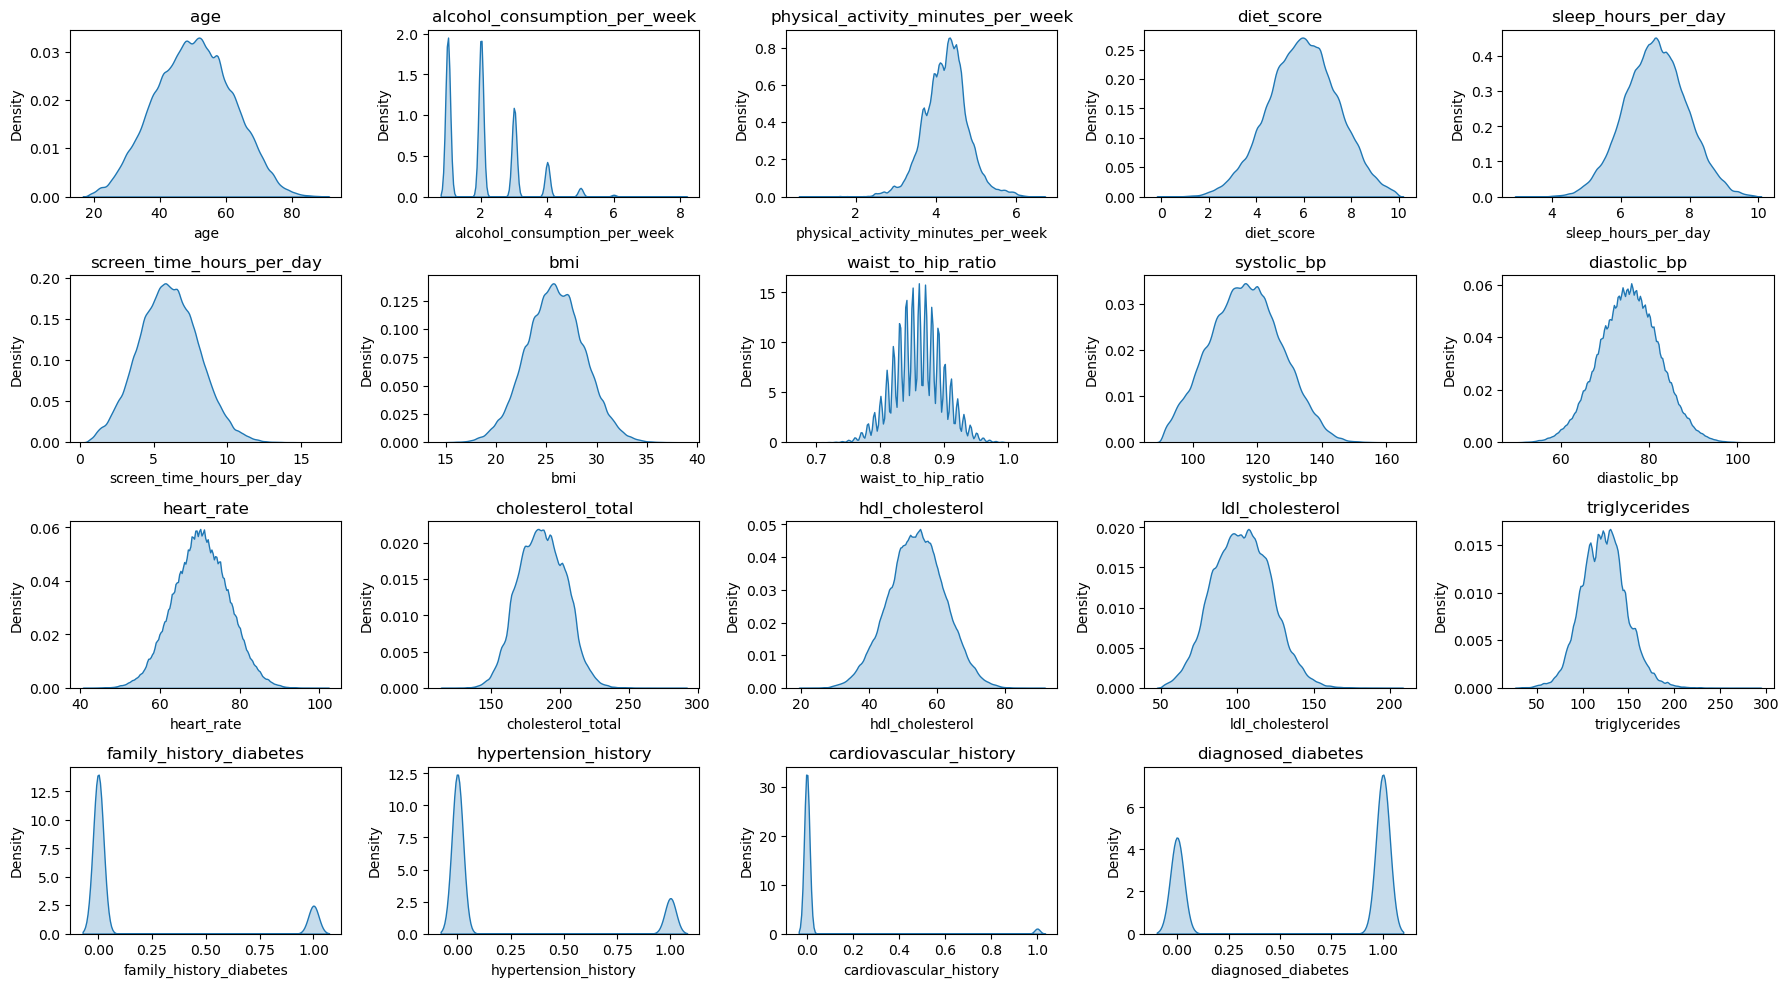

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18,12))

for i, col in enumerate(num_cols, 1):
    plt.subplot(5,5,i)
    sns.kdeplot(df[col], fill=True)
    plt.title(col)

plt.tight_layout()
plt.show()


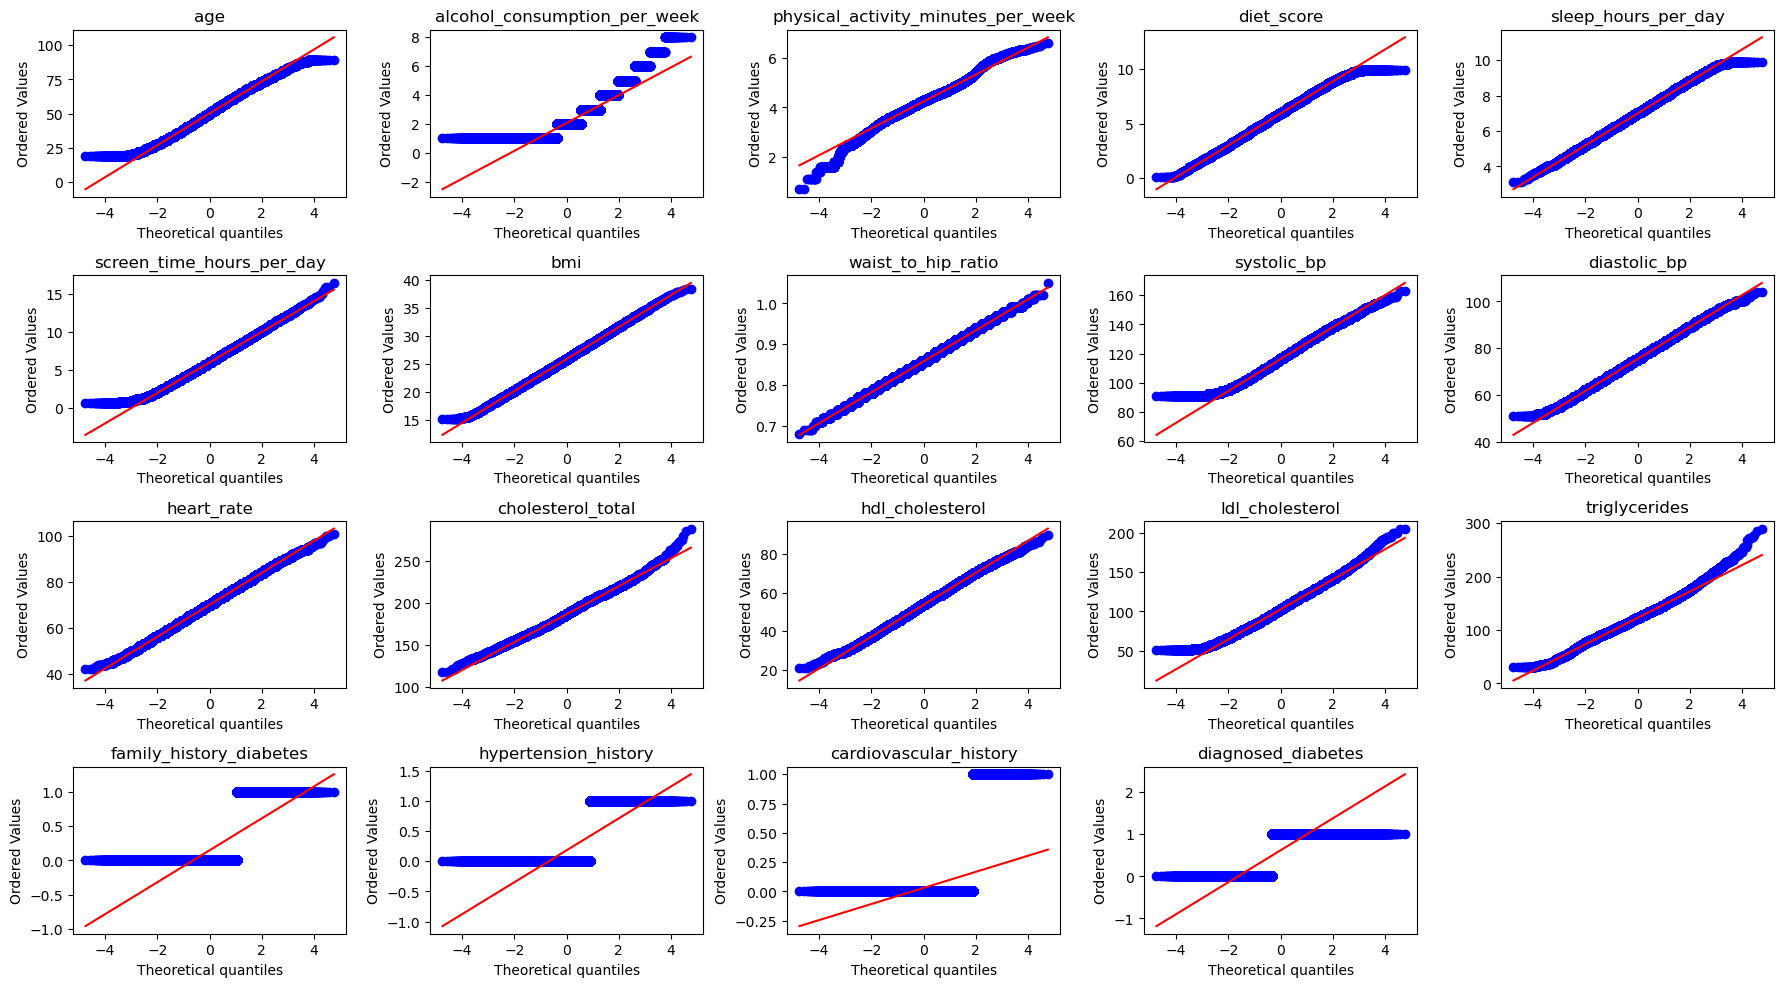

In [54]:
import scipy.stats as stats

plt.figure(figsize=(18,12))

for i, col in enumerate(num_cols, 1):
    plt.subplot(5,5,i)
    stats.probplot(df[col], plot=plt)
    plt.title(col)

plt.tight_layout()
plt.show()


In [56]:
obj_cols = df.select_dtypes(include=['object']).columns
print(obj_cols)


Index(['gender', 'ethnicity', 'education_level', 'income_level',
       'smoking_status', 'employment_status'],
      dtype='object')


<Axes: ylabel='count'>

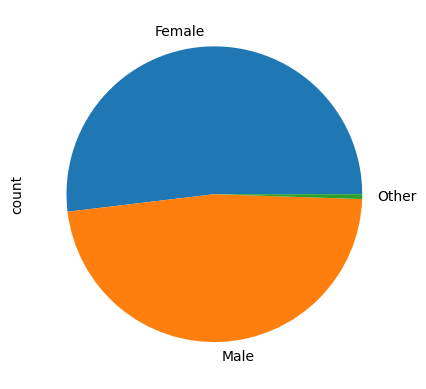

In [61]:
df['gender'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

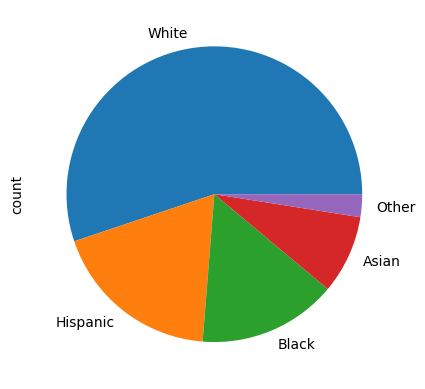

In [62]:
df['ethnicity'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

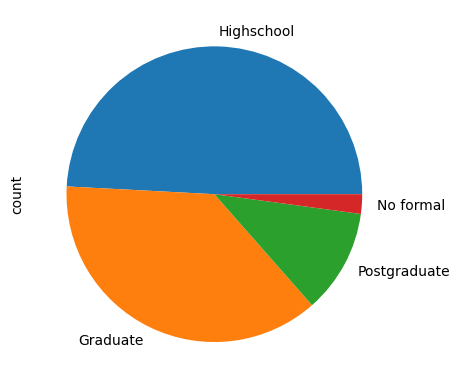

In [63]:
df['education_level'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

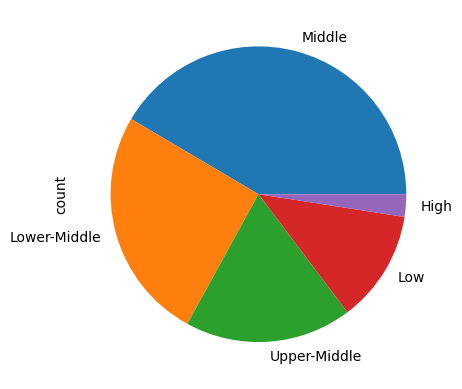

In [64]:
df['income_level'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

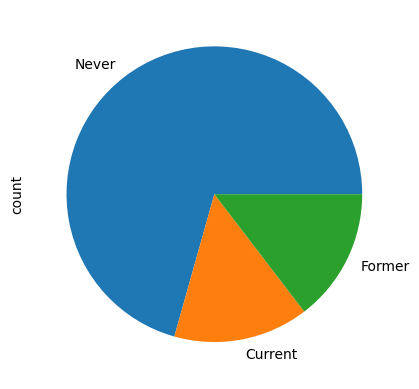

In [65]:
df['smoking_status'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

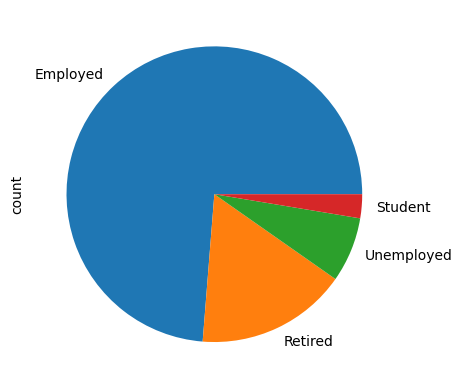

In [66]:
df['employment_status'].value_counts().plot(kind='pie')

In [68]:
label_encoders = {}

for col in ['gender','ethnicity','education_level','income_level','smoking_status','employment_status']:
    
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le


In [69]:
df[['gender','ethnicity','education_level','income_level',
    'smoking_status','employment_status']].head()


,gender,ethnicity,education_level,income_level,smoking_status,employment_status
0,0,2,1,2,0,0
1,0,4,1,4,2,0
2,1,2,1,2,2,1
3,0,4,1,2,0,0
4,1,4,1,4,2,1


In [72]:
df.head()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,31,1,3.828641,7.7,6.8,6.1,33.4,0.93,112,70,...,0,2,1,2,0,0,0,0,0,1.0
1,50,2,4.304065,5.7,6.5,5.8,23.8,0.83,120,77,...,0,4,1,4,2,0,0,0,0,1.0
2,32,3,5.068904,8.5,7.4,9.1,24.1,0.83,95,89,...,1,2,1,2,2,1,0,0,0,0.0
3,54,3,4.356709,4.6,7.0,9.2,26.6,0.83,121,69,...,0,4,1,2,0,0,0,1,0,1.0
4,54,1,4.025352,5.7,6.2,5.1,28.8,0.90,108,60,...,1,4,1,4,2,1,0,1,0,1.0


In [73]:
df.shape

(699997, 25)

In [77]:
X = df.iloc[:,:24]
y = df['diagnosed_diabetes']

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

In [82]:
scaler = StandardScaler()

In [83]:
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [84]:
X_train.shape

(559997, 24)

In [ ]:
res = []
for i in range(1,25):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train_scale)
    X_test_trf = pca.transform(X_test_scale)
    for j in range(1,15):
        knn = KNeighborsClassifier(n_neighbors=j,weights='distance')
        knn.fit(X_train_trf,y_train)
        y_pred = knn.predict(X_test_trf)
        acc = accuracy_score(y_test,y_pred)
        res.append({
            "PCA_COM":i,
            "n_neighbor":j,
            "acc":acc
        })
df_res = pd.DataFrame(res)